<a href="https://colab.research.google.com/github/zidankhainur2/machine-learning-practice/blob/main/Tugas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5d0682fc386b42d81cbf41f18a8864e612ce5e6cacac6891c9e3c490d5647e58
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuz

In [ ]:
#Data
dataset = pd.read_csv("employee.csv")

In [ ]:

# Fungsi keanggotaan Trapesium
def trapesium(x, a, b, c, d):
    return np.fmax(0, np.fmin((x - a) / (b - a), np.fmin(1, (d - x) / (d - c))))


# Fungsi keanggotaan Gaussian
def gaussian(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Klasifikasi
def classify_age(age):
    if age <= 30:
        return 'young'
    elif 30 < age <= 40:
        return 'middle-aged'
    else:
        return 'old'

def classify_yos(yos):
    if yos <= 5:
        return 'new'
    else:
        return 'loyal'

def classify_salary(salary):
    if salary <= 3500:
        return 'low'
    elif 3500 < salary <= 5000:
        return 'medium'
    else:
        return 'high'

# Rule-Based
def RuleBased(age_status, yos_status, salary_status):
    emp_status = ""
    if (age_status == 'young' or age_status == 'middle-aged') and yos_status == 'new' and (salary_status == 'low' or salary_status == 'medium'):
        emp_status = "Contract Employee"
    elif (age_status == 'middle-aged' or age_status == 'old') and yos_status == 'loyal' and (salary_status == 'medium' or salary_status == 'high'):
        emp_status = "Permanent Employee"
    else:
        emp_status = "Unknown"
    return emp_status


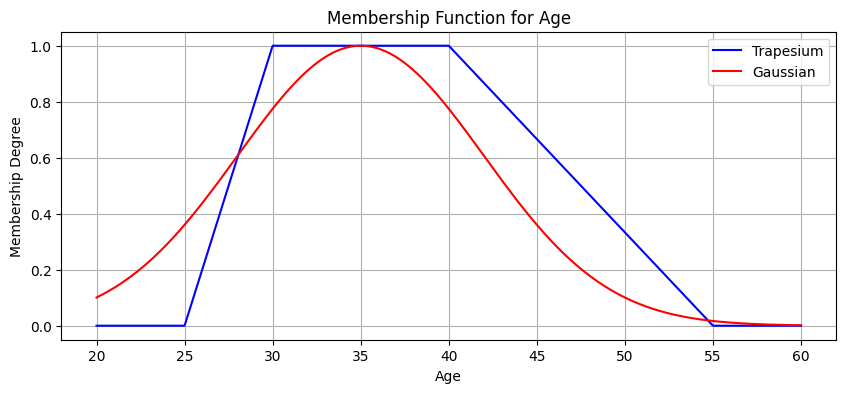

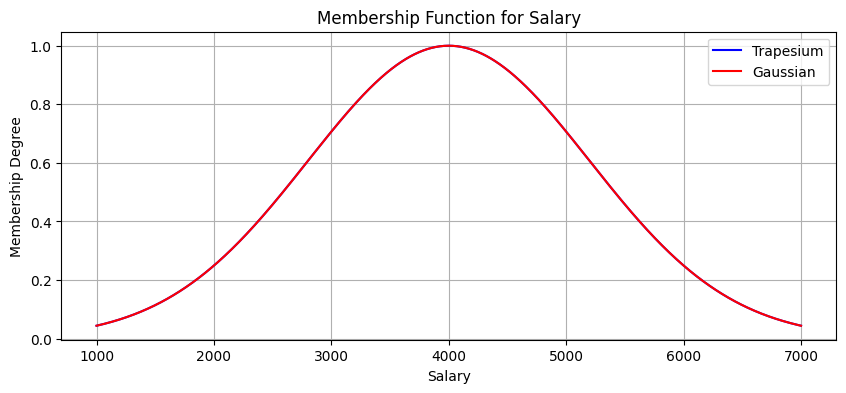

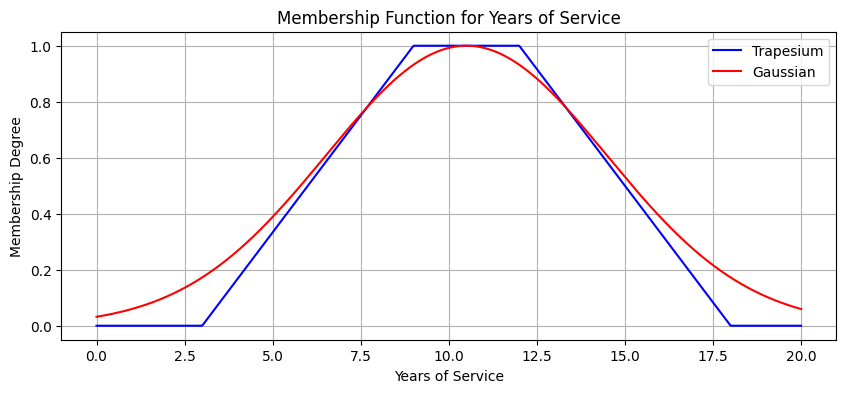

In [ ]:
# Fungsi keanggotaan trapesium untuk age
x_age = np.linspace(20, 60, 1000)
age_trapesium = trapesium(x_age, 25, 30, 40, 55)
age_gaussian = gaussian(x_age, 35, 7)

# plot fungsi keanggotaan trapesium dan gaussian untuk age
plt.figure(figsize=(10, 4))
plt.plot(x_age, age_trapesium, 'b', label='Trapesium')
plt.plot(x_age, age_gaussian, 'r', label='Gaussian')
plt.title('Membership Function for Age')
plt.xlabel('Age')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Fungsi keanggotaan trapesium untuk salary
x_salary = np.linspace(1000, 7000, 1000)
salary_trapesium = gaussian(x_salary, 4000, 1200)
salary_gaussian = gaussian(x_salary, 4000, 1200)

# Plot fungsi keanggotaan trapesium dan gaussian untuk salary
plt.figure(figsize=(10, 4))
plt.plot(x_salary, salary_trapesium, 'b', label='Trapesium')
plt.plot(x_salary, salary_gaussian, 'r', label='Gaussian')
plt.title('Membership Function for Salary')
plt.xlabel('Salary')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Fungsi kenaggotaan trapesium untuk years of service
x_yos = np.linspace(0, 20, 1000)
yos_trapesium = trapesium(x_yos, 3, 9, 12, 18)
yos_gaussian = gaussian(x_yos, 10.5, 4)

# Plot fungsi keanggotaan trapesium dan gaussian untuk years of service
plt.figure(figsize=(10, 4))
plt.plot(x_yos, yos_trapesium, 'b', label='Trapesium')
plt.plot(x_yos, yos_gaussian, 'r', label='Gaussian')
plt.title('Membership Function for Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Hitung nilai derajat keanggotaan untuk setiap employee
age_membership_trapesium = []
age_membership_gaussian = []
salary_membership_trapesium = []
salary_membership_gaussian = []
yos_membership_trapesium = []
yos_membership_gaussian = []

for index, row in dataset.iterrows():
    age_mem_trapesium = trapesium(row['Age'], 25, 30, 40, 55)
    age_mem_gaussian = gaussian(row['Age'], 35, 7)
    age_membership_trapesium.append(age_mem_trapesium)
    age_membership_gaussian.append(age_mem_gaussian)

    salary_mem_trapesium = trapesium(row['Salary'], 1000, 3500, 4500, 7000)
    salary_mem_gaussian = gaussian(row['Salary'], 4000, 1200)
    salary_membership_trapesium.append(salary_mem_trapesium)
    salary_membership_gaussian.append(salary_mem_gaussian)

    yos_mem_trapesium = trapesium(row['Years of Service'], 3, 9, 12, 18)
    yos_mem_gaussian = gaussian(row['Years of Service'], 10.5, 4)
    yos_membership_trapesium.append(yos_mem_trapesium)
    yos_membership_gaussian.append(yos_mem_gaussian)

In [ ]:
# Tentukan status employee berdasarkan nilai keanggotaan
employee_status = []
for i in range(len(dataset)):
    age_status_trapesium = classify_age(dataset['Age'][i])
    age_status_gaussian = classify_age(dataset['Age'][i])
    yos_status_trapesium = classify_yos(dataset['Years of Service'][i])
    yos_status_gaussian = classify_yos(dataset['Years of Service'][i])
    salary_status_trapesium = classify_salary(dataset['Salary'][i])
    salary_status_gaussian = classify_salary(dataset['Salary'][i])

    # Menentukan employee status menggunakan fungsi rule-based pada metode trapesium
    emp_status_trapesium = RuleBased(age_status_trapesium, yos_status_trapesium, salary_status_trapesium)

    # Menentukan employee status menggunakan fungsi rule-based pada metode gaussian
    emp_status_gaussian = RuleBased(age_status_gaussian, yos_status_gaussian, salary_status_gaussian)

    employee_status.append((dataset.iloc[i]['ID'],
                            dataset.iloc[i]['Name'],
                            age_status_trapesium,
                            yos_status_trapesium,
                            salary_status_trapesium,
                            emp_status_trapesium,
                            age_status_gaussian,
                            yos_status_gaussian,
                            salary_status_gaussian,
                            emp_status_gaussian))

# Membuat DataFrame dari list employee_status
status_columns = ['ID',
                  'Name',
                  'Age Status (Trapesium)',
                  'Years of Service Status (Trapesium)',
                  'Salary Status (Trapesium)',
                  'Employee Status (Trapesium)',
                  'Age Status (Gaussian)',
                  'Years of Service Status (Gaussian)',
                  'Salary Status (Gaussian)',
                  'Employee Status (Gaussian)']
result_df = pd.DataFrame(employee_status, columns=status_columns)
result_df

,ID,Name,Age Status (Trapesium),Years of Service Status (Trapesium),Salary Status (Trapesium),Employee Status (Trapesium),Age Status (Gaussian),Years of Service Status (Gaussian),Salary Status (Gaussian),Employee Status (Gaussian)
0,NO01,Ani,middle-aged,new,low,Contract Employee,middle-aged,new,low,Contract Employee
1,NO02,Budi,young,new,low,Contract Employee,young,new,low,Contract Employee
2,NO03,Risa,young,loyal,low,Unknown,young,loyal,low,Unknown
3,NO04,Soni,old,loyal,medium,Permanent Employee,old,loyal,medium,Permanent Employee
4,NO05,Huda,middle-aged,loyal,high,Permanent Employee,middle-aged,loyal,high,Permanent Employee
5,NO06,Rani,middle-aged,new,low,Contract Employee,middle-aged,new,low,Contract Employee
6,NO07,Ria,middle-aged,new,medium,Contract Employee,middle-aged,new,medium,Contract Employee
7,NO08,Ridho,old,loyal,high,Permanent Employee,old,loyal,high,Permanent Employee
8,NO09,Rusdi,middle-aged,new,medium,Contract Employee,middle-aged,new,medium,Contract Employee
9,NO10,Burhan,middle-aged,loyal,high,Permanent Employee,middle-aged,loyal,high,Permanent Employee
